<h2>P1

<h3>1

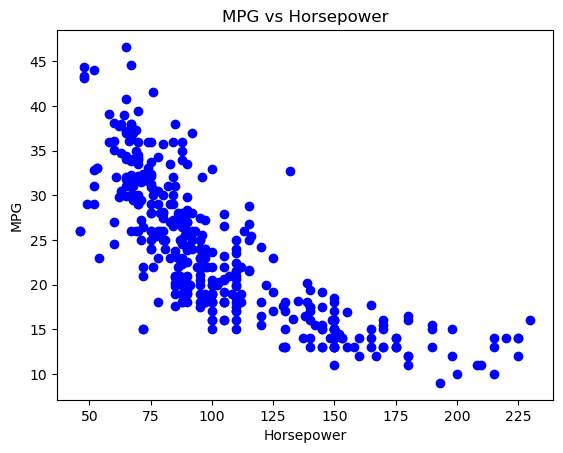

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

auto_data = pd.read_csv("Auto.csv") 

# Converting horsepower to numeric, forcing errors=coerce to handle any non-numeric values
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')

# Droping rows with missing values in horsepower or mpg
auto_data = auto_data.dropna(subset=['horsepower', 'mpg'])

# Plot 1: data
plt.scatter(auto_data['horsepower'], auto_data['mpg'], color='blue', label='Data Points')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower')
plt.show()  


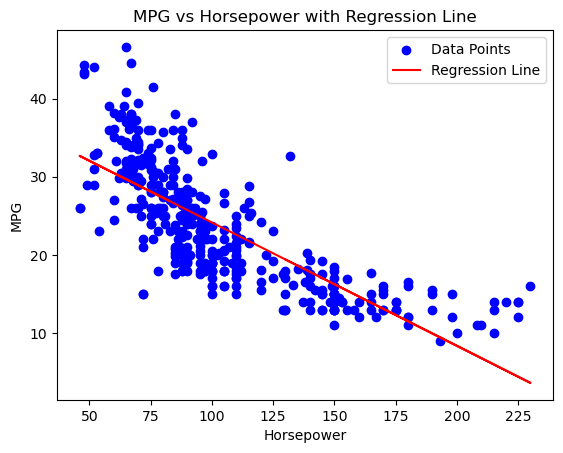

In [42]:

# Fitting the regression model
X = sm.add_constant(auto_data['horsepower']) 
y = auto_data['mpg']
model = sm.OLS(y, X).fit()

# Plot: Scatter plot + regression line
plt.scatter(auto_data['horsepower'], auto_data['mpg'], color='blue', label='Data Points')
plt.plot(auto_data['horsepower'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower with Regression Line')
plt.legend()
plt.show()

<h3> 2a -  Is there a relationship between the predictor and the response?

In [43]:
# Checking if the relationship between horsepower and mpg is statistically significant
p_value = model.pvalues['horsepower']
print(p_value)
if p_value < 0.05:
    print("Yes")
else:
    print("No")


7.031989029403661e-81
Yes


<h3>2b - How strong is the relationship between the predictor and the response?

In [44]:
# Extracting the R2 value from the model
r_squared = model.rsquared
print("Answer: The R-squared value is", round(r_squared, 4), 
      "which means the model explains", round(r_squared * 100, 2), "% of the variation in mpg.")

Answer: The R-squared value is 0.6059 which means the model explains 60.59 % of the variation in mpg.


<h3>2c - Is the relationship between the predictor and the response positive or negative?

In [45]:
# Extracting the slope coefficient for horsepower
slope = model.params['horsepower']
if slope > 0:
    print("Answer: The relationship is positive.")
else:
    print("Answer: The relationship is negative.")


Answer: The relationship is negative.


<h3> 2d -  What is the predicted mpg associated with a horsepower of 98?

In [46]:
# Predicting the mpg for a car with horsepower of 98
predicted_mpg = model.predict([1, 98]) 
print("Answer: The predicted mpg for a horsepower of 98 is", round(predicted_mpg[0], 2))

Answer: The predicted mpg for a horsepower of 98 is 24.47
